<a href="https://colab.research.google.com/github/NicolasSocquetJuglard/TP4_ML/blob/main/TP4_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.utils import dataset_utils
from keras.utils import image_utils
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense

import tensorflow as tf
from typeguard import typechecked
import tensorflow_addons as tfa
from tensorflow_addons.utils.types import AcceptableDTypes, FloatTensorLike
from typing import Optional



/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
import pathlib
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#path toward the images

path = '/content/drive/MyDrive/Colab/cats_and_dogs'
path_train = path + '/train'
path_test = path + '/test'

In [7]:
train_datagen =  keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.15,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    preprocessing_function = preprocess_input,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        path_train,
        target_size = (300, 300),
        batch_size = 16,
        shuffle = True)

test_generator = test_datagen.flow_from_directory(
        path_test,
        target_size = (300, 300),
        batch_size = 16,
        shuffle = True)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


Model 1 : InceptionV3

In [8]:
base_model_1 = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (300, 300, 3))

In [9]:
#Freezing all layers

for layer in base_model_1.layers:
  layer.trainable = False

In [10]:
x1 = base_model_1.output
x1 = Flatten()(x1)
x1 = Dense(100, activation = 'relu')(x1)
predictions1 = Dense(2, activation='softmax', kernel_initializer='random_uniform')(x1)

In [11]:
#Building model
model1 = Model(name = "model1", inputs = base_model_1.input, outputs = predictions1)

#Compiling model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
Hist = []

Hist.append(model1.fit(x = train_generator, validation_data = test_generator, epochs = 2))

Epoch 1/2
35/35 [==============================] - 213s 6s/step - loss: 0.6463 - accuracy: 0.8995 - val_loss: 0.4942 - val_accuracy: 0.9143
Epoch 2/2
35/35 [==============================] - 188s 5s/step - loss: 0.1947 - accuracy: 0.9731 - val_loss: 0.2323 - val_accuracy: 0.9786


In [13]:
hist1 = Hist[0]

In [14]:
# View all the layers of the network

model1.summary()

Model: "model1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                            

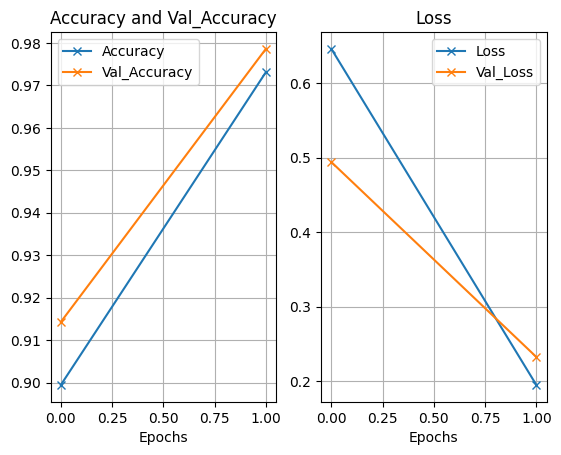

In [15]:
#Evaluating model 1

acc, val_acc = hist1.history['accuracy'], hist1.history['val_accuracy'],
loss, val_loss = hist1.history['loss'], hist1.history['val_loss']

epochs = hist1.epoch

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-x', label = 'Accuracy')
plt.plot(epochs, val_acc, '-x', label = 'Val_Accuracy')
plt.grid(True)
plt.title("Accuracy and Val_Accuracy")
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-x', label = 'Loss')
plt.plot(epochs, val_loss, '-x', label = 'Val_Loss')
plt.grid(True)
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [ ]:
# Try to display F1_score but we got an error message 
# saying not enough place in the RAM

# metric = tfa.metrics.F1Score(
#     num_classes = 2, average=None, threshold=None, name='f1_score', dtype=None
# )

# metric.update_state(test_generator, predictions1)
# result = metric.result()
# result.numpy()


Step 2 :

Repeat the step 1 with another model, compare and choose the best model

Model 2 : VGG16

In [ ]:
base_model_2 = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

In [ ]:
for layer in base_model_2.layers:
    layer.trainable = False

In [ ]:
x2 = base_model_2.output
x2 = keras.layers.Flatten()(x2)
x2 = keras.layers.Dense(100, activation='relu')(x2)
predictions2 = keras.layers.Dense(2, activation='softmax', kernel_initializer='random_uniform')(x2)

In [ ]:
#Building model
model2 = Model(name = "model2", inputs = base_model_2.input, outputs = predictions2)

#Compiling model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
Hist.append(model2.fit(x = train_generator, validation_data = test_generator, epochs = 2))

In [ ]:
hist2 = Hist[1]

In [ ]:
# View all the layers of the network

model2.summary()

In [ ]:
#Evaluating model 2

acc, val_acc = hist2.history['accuracy'], hist2.history['val_accuracy']
loss, val_loss = hist2.history['loss'], hist2.history['val_loss']

epochs = hist2.epoch

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-x', label = 'Accuracy')
plt.plot(epochs, val_acc, '-x', label = 'Val_Accuracy')
plt.grid(True)
plt.title("Accuracy and Val_Accuracy")
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-x', label = 'Loss')
plt.plot(epochs, val_loss, '-x', label = 'Val_Loss')
plt.grid(True)
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

Model 3 : keras.Sequential

In [ ]:

batch_size = 32
img_height = 300
img_width = 300

model3 = keras.Sequential([
  layers.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(1, activation='sigmoid'),
])

model3.compile(loss='binary_crossentropy',
              #loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #optimizer='rmsprop',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
Hist.append(model3.fit(x = train_generator, validation_data = test_generator, epochs = 2))

In [ ]:
hist3 = Hist[2]

In [ ]:
model3.summary()

In [ ]:
#Evaluating model 3

acc, val_acc = hist3.history['accuracy'], hist3.history['val_accuracy']
loss, val_loss = hist3.history['loss'], hist3.history['val_loss']

epochs = hist3.epoch

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-x', label = 'Accuracy')
plt.plot(epochs, val_acc, '-x', label = 'Val_Accuracy')
plt.grid(True)
plt.title("Accuracy and Val_Accuracy")
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-x', label = 'Loss')
plt.plot(epochs, val_loss, '-x', label = 'Val_Loss')
plt.grid(True)
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [ ]:
#Getting max accuracy for each model, and the epoch for which this accuracy was reached
Acc = [{'model' : hist.model.name, 'max_acc' : np.max(hist.history['val_accuracy']), 'epoch' : hist.history['val_accuracy'].index(np.max(hist.history['val_accuracy']))+1} for hist in Hist]


In [ ]:
#Best model
def find_best(e):
  return e['max_acc']

Acc.sort(reverse = True, key = find_best)

print(f"Best model : {Acc[0]['model']}, \nMaximum accuracy of {round(Acc[0]['max_acc'], 5)} happened for epoch number {Acc[0]['epoch']}")
